In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fnames = glob.glob('/data2/GBT/*295/OnOff/*/*rfireduced.npz')
fnames.sort()
print len(fnames)

32


In [4]:
print fnames[0]

/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.A.fits.rfireduced.npz


In [5]:
print fnames[4]

/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits.rfireduced.npz


In [6]:
x = np.load(fnames[0])
y = np.load(fnames[4])

In [7]:
x['source']

array('ON', 
      dtype='|S2')

In [8]:
y['source']

array('OFF', 
      dtype='|S3')

In [9]:
freqs = x['freqs']
onmask = x['valid']
offmask = y['valid']
onSonD = x['xxon']
onSoffD = x['xxoff']
offSonD = y['xxon']
offSoffD = y['xxoff']

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice


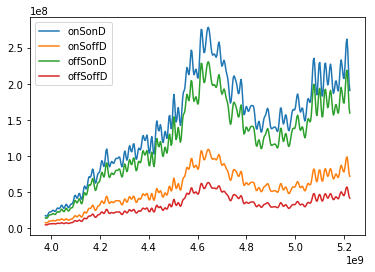

In [10]:
plot(freqs, np.nanmean(onSonD, 0), label='onSonD')
plot(freqs, np.nanmean(onSoffD, 0), label='onSoffD')
plot(freqs, np.nanmean(offSonD, 0), label='offSonD')
plot(freqs, np.nanmean(offSoffD, 0), label='offSoffD')
legend()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


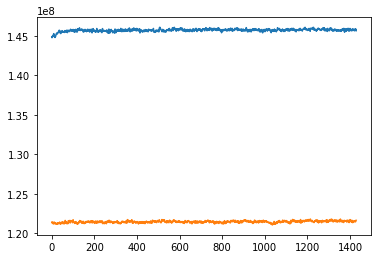

In [11]:
plot(np.nanmean(onSonD, 1))
plot(np.nanmean(offSonD, 1))

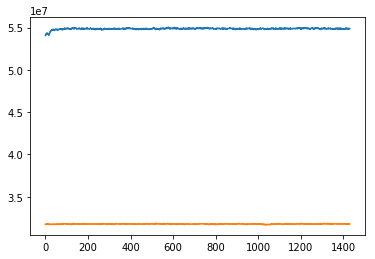

In [12]:
plot(np.nanmean(onSoffD, 1))
plot(np.nanmean(offSoffD, 1))

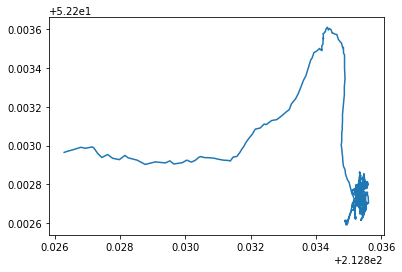

In [13]:
plot(x['sra'], x['sdec'])

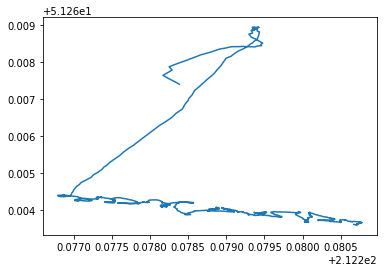

In [14]:
plot(y['sra'], y['sdec'])

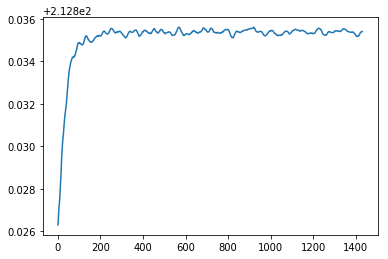

In [15]:
plot(x['sra'])

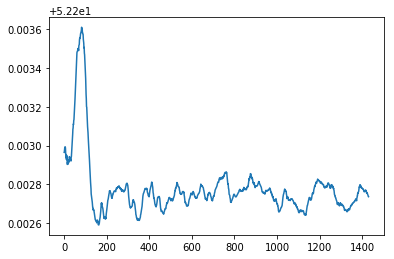

In [16]:
plot(x['sdec'])

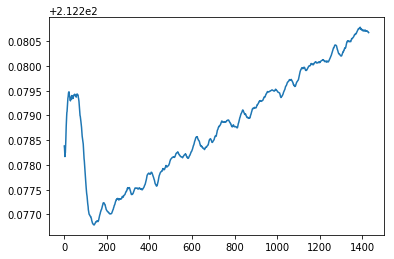

In [17]:
plot(y['sra'])

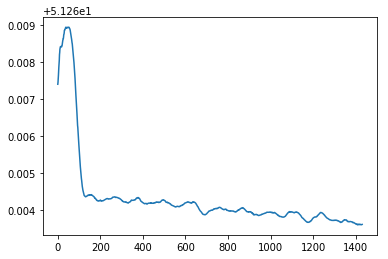

In [18]:
plot(y['sdec'])

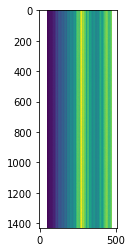

In [19]:
imshow(offSonD)

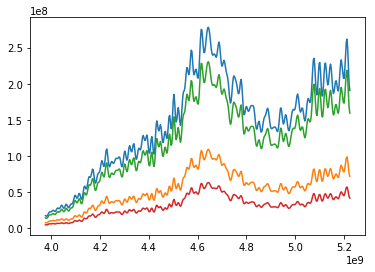

In [20]:
plot(freqs[onmask], np.nanmean(onSonD[200:,onmask], 0))
plot(freqs[onmask], np.nanmean(onSoffD[200:,onmask], 0))
plot(freqs[offmask], np.nanmean(offSonD[200:,offmask], 0))
plot(freqs[offmask], np.nanmean(offSoffD[200:,offmask], 0))

In [21]:
dioderesponse_onS = onSonD[200:,onmask] - onSoffD[200:,onmask]
dioderesponse_offS = offSonD[200:,offmask] - offSoffD[200:,offmask]

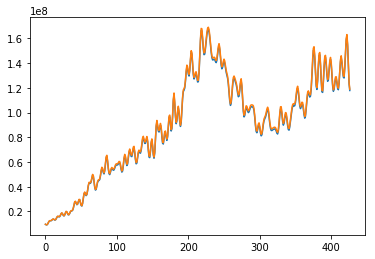

In [22]:
plot(np.nanmean(dioderesponse_offS, 0))
plot(np.nanmean(dioderesponse_onS, 0))

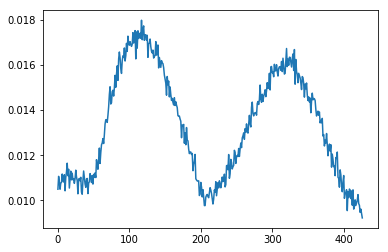

In [23]:
plot((np.nanmean(dioderesponse_onS, 0) - np.nanmean(dioderesponse_offS, 0)) / np.nanmean(dioderesponse_offS, 0))

In [24]:
sourceresponse_onD = onSonD[200:,offmask] - offSonD[200:,offmask]
sourceresponse_offD = onSoffD[200:,offmask] - offSoffD[200:,offmask]

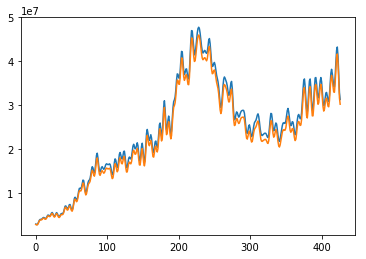

In [25]:
plot(np.nanmean(sourceresponse_onD, 0))
plot(np.nanmean(sourceresponse_offD, 0))

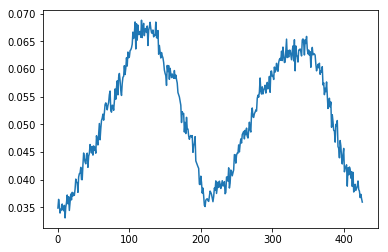

In [26]:
plot((np.nanmean(sourceresponse_onD, 0) - np.nanmean(sourceresponse_offD, 0)) / np.nanmean(sourceresponse_offD, 0))

In [27]:
diode_per_source = dioderesponse_offS / sourceresponse_offD

In [28]:
diode_per_source1 = dioderesponse_onS / sourceresponse_offD
diode_per_source2 = dioderesponse_offS / sourceresponse_onD     #this one is the worst
diode_per_source3 = dioderesponse_offS / sourceresponse_offD

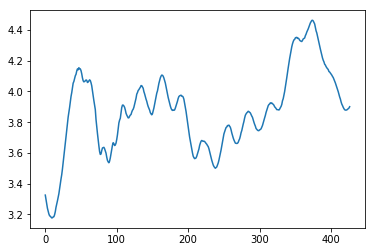

In [29]:
plot(np.nanmean(diode_per_source, 0))

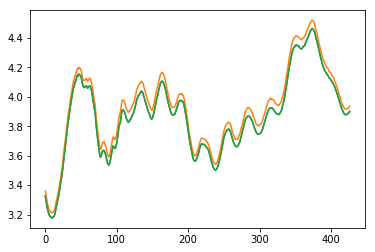

In [30]:
plot(np.nanmean(diode_per_source, 0))
plot(np.nanmean(diode_per_source1, 0))
#plot(np.nanmean(diode_per_source2, 0))
plot(np.nanmean(diode_per_source3, 0)) 

In [31]:
# diode response is then diode_per_source * source power (3mJy) 

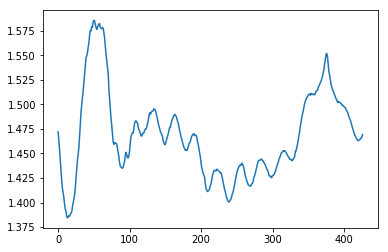

In [32]:
plot(np.nanmean(onSoffD[200:,offmask], 0) / np.nanmean(onSonD[200:,offmask], 0) * np.nanmean(diode_per_source, 0))

In [33]:
gain = np.nanmean(onSoffD[200:,offmask] - offSoffD[200:,offmask], 0) / 6.0 
Pdiode = np.nanmean(offSonD[200:,offmask] - offSoffD[200:,offmask], 0) / gain

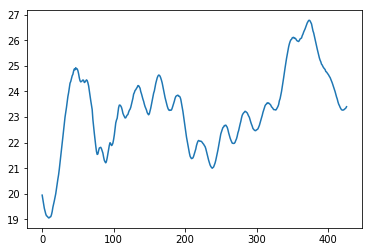

In [35]:
plot(Pdiode)

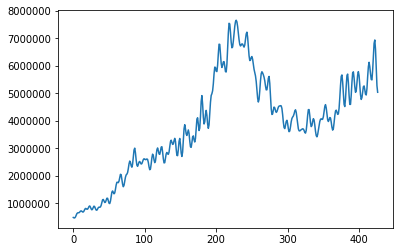

In [36]:
plot(gain)

In [47]:
freqs = x['freqs']
freqs = freqs[offmask]

In [38]:
a0 = 1.4866 
a1 = -0.7871
a2 = -0.3440
a3 = 0.0749

In [57]:
def S295(freqs):
    f = freqs * 1.e-9
    logf = np.log10(f)
    logS = a0 + a1*logf + a2*logf**2 + a3*logf**3
    return 10.**(logS)

In [58]:
Psource = S295(freqs)

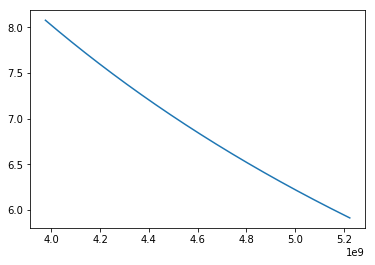

In [59]:
plot(freqs, Psource)

In [60]:
gain = np.nanmean(onSoffD[200:,offmask] - offSoffD[200:,offmask], 0) / Psource
Pdiode = np.nanmean(offSonD[200:,offmask] - offSoffD[200:,offmask], 0) / gain

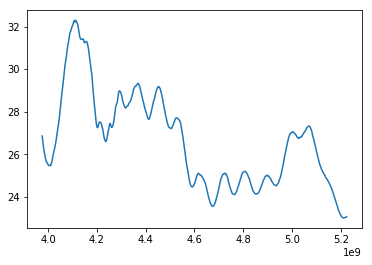

In [62]:
plot(freqs, Pdiode)